The following is an abbreviated look at Chapter 3 of Learning TensorFlow.

### Workflow

Working in TensorFlow boils down to two simple steps

1. Construct your execution graph
2. Run it in a session

Say you wanted to use TensorFlow to implement the following.

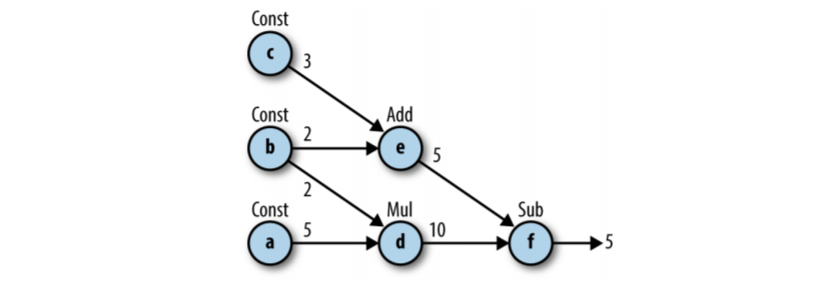

In [1]:
from IPython.display import Image

Image('images/graph.png')

#### Construct your execution graph

Arriving at our final value of `5` requires a few intermediate values along the way. We could express this in pure python with the following:

In [2]:
a = 5
b = 2
c = 3
d = a * b
e = b + c
f = d - e
print(f)

5


The key difference between this approach and how TensorFlow is organized is that whereas all of this execution is actually happening line by line, when we construct our network, **nothing actually gets exectuted**. For example:

In [3]:
import tensorflow as tf

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

d = tf.multiply(a, b)
e = tf.add(b, c)

f = tf.subtract(d, e)

Then, once we have our execution graph, we can run everything by spinning up a `Session` object. As a best practice, we'll use a context manager.

In [4]:
with tf.Session() as sess:
    result = sess.run(f)

print(result)

5


A quick note on this-- `f`, our result variable, depended on everything before it (see the execution graph above). As a result, TensorFlow went ahead and executed each node in the graph (a process called *fetching*). If, however, we didn't need any node in the graph, it would happily skip over it and save us resources/time.

### Variables and Placeholders

As we saw above, we constructed our graph by instantiating some nodes and then doing things to them. In the example, we made `constants`, but there are other types of nodes worth using.

- `tf.Variable`, the trainable parameters of our model, modified as a result of training
- `tf.placeholder`, used to pass input data

#### Variables

Unlike `tf.constant`s which are immutable, these objects can change as a result of execution, but also maintain state iteration-to-iteration.

Furthermore, they must be explicitly instantiated by running `tf.global_variables_initializer()` at the beginning of your `tf.Session()`.

In [5]:
init_vals = [1, 2, 3]
var = tf.Variable(init_vals)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(var))

[1 2 3]


#### Placeholders

On the other hand, we'll often want to pass data *into* a model for training/scoring purposes. If a regression is a big `y = mX + b` problem, we need a way to pass in the `X`.

Thus we use `tf.placeholder()`, passing in a datatype and an expected shape. The shape variable can be a tuple of fixed size, but if we pass `None` as any of the dimensions, we allow for arbitrarily many observations (often on the number-of-records-level).

The following are all valid instantiations.

In [6]:
tf.placeholder(tf.float32, shape=(1, 10))
tf.placeholder(tf.float64, shape=(None, 100))
tf.placeholder(tf.bool, shape=(None));

To actually use the placeholder, though, you must pass the `feed_dict` argument to your `Session().run()` call.

As a quick example, say you wanted, for some reason, to normalize a list of floats relative to all of the values in the list... using TensorFlow.

In [7]:
vals = tf.placeholder(tf.float64, shape=(None,))

mean, stdev = tf.nn.moments(vals, axes=0)

normed = (vals - mean) / stdev

In [8]:
input_data = [1, 2, 3, 4, 5, 6, 7]

In [9]:
with tf.Session() as sess:
    normed_vals = sess.run(normed,
                           feed_dict={vals: input_data})
    
print(normed_vals)

[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75]


#### A note on datatypes

If you've got incompatible types between two tensors, the whole execution will error out.

In [10]:
a = tf.constant(1.0)
b = tf.constant(2)

try:
    c = a + b
except TypeError:
    print("Whoops")
    
with tf.Session() as sess:
    sess.run(c)

Whoops


But we can easily fix this using `tf.cast()`

In [11]:
a = tf.constant(1.0)
b = tf.constant(2)

try:
    a = tf.cast(a, tf.int32)
    c = a + b
except TypeError:
    print("Whoops")
    
with tf.Session() as sess:
    print(sess.run(c))

3
